In [5]:
import pickle
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
from time import time
from sklearn import linear_model
from sklearn import preprocessing
# Library to be able to use bow
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
# library to be able to use gnb
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.externals import joblib
import os.path

# Conversor a formato de lectura del DF

In [54]:
data_frame_convert = pd.read_csv("4K_dataset_enron.csv")
address = data_frame_convert['Name_File']
csv_file = "./enronText.csv"

with open(csv_file,'a') as writer:
    h = "Name,Category,Text"
    writer.write(h)
    writer.write('\n')
                
for file in address:
    cat = data_frame_convert[data_frame_convert['Name_File']==file]['Category'].iloc[0]
    print(cat)
    if cat == 1:
        path_spam = "./spam/"+file+".txt"
        if os.path.isfile(path_spam):
            
            with open(path_spam, 'r',encoding='utf-8',errors='ignore') as txt_spam:
                text_spam = str(txt_spam.read()).replace('\n','').replace(',','')
            with open(csv_file,'a') as writer:
                    h = file+","+str(cat)+","+text_spam 
                    writer.writelines(h)
                    writer.write('\n')
    
    else:
        path_ham = "./ham/"+file+".txt"
        if os.path.isfile(path_ham):
            
            with open(path_ham, 'r') as txt:
                text_ham = str(txt.read()).replace('\n', '').replace(',','')
            with open(csv_file,'a') as writer:
                    h = file+","+str(cat)+","+text_ham
                    writer.writelines(h)
                    writer.write('\n')
        

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [55]:
data_frame = pd.read_csv("enronText.csv")
print(data_frame)
lb = preprocessing.LabelBinarizer()
train_data, test_data = train_test_split(data_frame, test_size=.3, random_state=9)
    
X = data_frame['Text'].astype(str)
y = data_frame['Category'].astype(str)
y_frame_binary = lb.fit_transform(data_frame['Category'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y_frame_binary, test_size=.3, random_state=9)

                            Name  Category  \
0                           ham1         0   
1     0002.1999-12-13.farmer.ham         0   
2     0003.1999-12-14.farmer.ham         0   
3     0004.1999-12-14.farmer.ham         0   
4     0005.1999-12-14.farmer.ham         0   
5     0007.1999-12-14.farmer.ham         0   
6     0009.1999-12-14.farmer.ham         0   
7     0010.1999-12-14.farmer.ham         0   
8     0011.1999-12-14.farmer.ham         0   
9     0012.1999-12-14.farmer.ham         0   
10    0013.1999-12-14.farmer.ham         0   
11    0014.1999-12-15.farmer.ham         0   
12    0015.1999-12-15.farmer.ham         0   
13    0016.1999-12-15.farmer.ham         0   
14    0019.1999-12-15.farmer.ham         0   
15    0020.1999-12-15.farmer.ham         0   
16    0021.1999-12-15.farmer.ham         0   
17    0022.1999-12-16.farmer.ham         0   
18    0023.1999-12-16.farmer.ham         0   
19    0024.1999-12-16.farmer.ham         0   
20    0025.1999-12-16.farmer.ham  

In [56]:
def tfidf_lr_builder(train_data):

    vectorizer = TfidfVectorizer(min_df=3, max_features=10000, norm='l2',
                                 use_idf=True, smooth_idf=True, ngram_range=([1, 1]))

    clf = linear_model.LogisticRegression( penalty='l2', C=50,random_state=0)
    tfidf_lr_clf = Pipeline([('vect', vectorizer), ('clf', clf)])
    tfidf_lr_clf = tfidf_lr_clf.fit(train_data['Text'].astype(str), train_data['Category'].astype(str))
    return tfidf_lr_clf

In [57]:
tfidf_lr_clf = tfidf_lr_builder(train_data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
my_tags = ['Ham','Spam']
def predict_pipeline_OVA(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    y_test = lb.inverse_transform(y_test)
    my_tags = pipeline.classes_

    evaluate_prediction(y_pred, y_test)
    precision_recall_f1(y_test, y_pred)
    
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    print(
        'Correctly Classifed {0} out of {1}'.format(accuracy_score(target, predictions, normalize=False), len(target)))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')
    print('(row=expected, col=predicted)')
    
    # count = 0
    false_predict = predictions == target
    paste_id = test_data['Name'].tolist()
   
    for idx, i in enumerate (false_predict):
        
        if i == False:
            print(paste_id[idx], target[idx], predictions[idx])

def precision_recall_f1(y_test, y_pred):
    print('\nmacro')
    p, r, f, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, average='macro')
    print('Precision: {0:0.3f}, Recall : {1:0.3f}, F1: {2:0.4f}'.format(p, r, f))

    print('\nmicro')
    p, r, f, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, average='micro')
    print('Precision: {0:0.3f}, Recall : {1:0.3f}, F1: {2:0.4f}'.format(p, r, f))

    print('\nweighted')
    p, r, f, _ = precision_recall_fscore_support(y_true=y_test, y_pred=y_pred, average='weighted')
    print('Precision: {0:0.3f}, Recall : {1:0.3f}, F1: {2:0.4f}'.format(p, r, f))

    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

    accuracy = np.average(recall)
    
    print('\nprecision: {}'.format(precision))
    print('\nrecall: {}'.format(recall))
    print('\nfscore: {}'.format(fscore))
    print('\nsupport: {}'.format(support))
    print('\nACC:{}'.format(accuracy))
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))    
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=90)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def save_classifer(obj, obj_name):
    pickle.dump(obj, open(obj_name, 'wb'))


def load_classifier(obj_name):
    return pickle.load(open(obj_name, 'rb'))

accuracy 0.9813144329896907
Correctly Classifed 1523 out of 1552
confusion matrix
 [[1075   18]
 [  11  448]]
(row=expected, col=predicted)
3299.2004-12-26.GP.spam 1 0
1460.2000-06-22.farmer.ham 0 1
0250.2004-01-20.GP.spam 1 0
1523.2000-06-28.farmer.ham 0 1
3803.2005-02-11.GP.spam 1 0
4051.2005-03-15.GP.spam 1 0
0340.2000-02-04.farmer.ham 0 1
4865.2001-09-06.farmer.ham 0 1
0388.2000-02-09.farmer.ham 0 1
0421.2000-02-16.farmer.ham 0 1
5050.2001-11-07.farmer.ham 0 1
5015.2001-10-26.farmer.ham 0 1
1823.2004-08-14.GP.spam 1 0
2710.2000-10-30.farmer.ham 0 1
1390.2000-06-19.farmer.ham 0 1
0772.2000-03-28.farmer.ham 0 1
3058.2000-12-11.farmer.ham 0 1
4227.2005-04-11.GP.spam 1 0
1871.2000-08-06.farmer.ham 0 1
2840.2004-11-16.GP.spam 1 0
0852.2000-04-05.farmer.ham 0 1
2612.2000-10-22.farmer.ham 0 1
3334.2001-01-12.farmer.ham 0 1
1469.2004-07-02.GP.spam 1 0
2668.2004-10-29.GP.spam 1 0
4518.2005-05-19.GP.spam 1 0
3545.2001-02-07.farmer.ham 0 1
3123.2004-12-09.GP.spam 1 0
4642.2001-06-04.farmer.ha

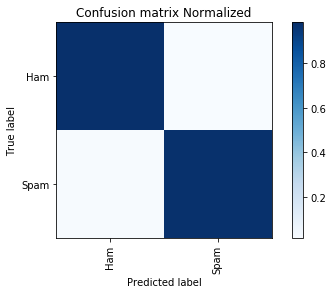

In [66]:
predict_pipeline_OVA(tfidf_lr_clf, X_test=X_test, y_test=y_test)

In [69]:
save_classifer(tfidf_lr_clf, 'tfidf_lr_clf.pkl')